In [181]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.inspection import permutation_importance

In [182]:
#membaca file
df = pd.read_csv("telecom_churn.csv")
df

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.70,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.70,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.00,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.00,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.00,3,166.7,113,41.0,7.42,10.1
...,...,...,...,...,...,...,...,...,...,...,...
3328,0,192,1,1,2.67,2,156.2,77,71.7,10.78,9.9
3329,0,68,1,0,0.34,3,231.1,57,56.4,7.67,9.6
3330,0,28,1,0,0.00,2,180.8,109,56.0,14.44,14.1
3331,0,184,0,0,0.00,2,213.8,105,50.0,7.98,5.0


In [183]:
#summary info 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Churn            3333 non-null   int64  
 1   AccountWeeks     3333 non-null   int64  
 2   ContractRenewal  3333 non-null   int64  
 3   DataPlan         3333 non-null   int64  
 4   DataUsage        3333 non-null   float64
 5   CustServCalls    3333 non-null   int64  
 6   DayMins          3333 non-null   float64
 7   DayCalls         3333 non-null   int64  
 8   MonthlyCharge    3333 non-null   float64
 9   OverageFee       3333 non-null   float64
 10  RoamMins         3333 non-null   float64
dtypes: float64(5), int64(6)
memory usage: 286.6 KB


In [184]:
#columns
df.columns

Index(['Churn', 'AccountWeeks', 'ContractRenewal', 'DataPlan', 'DataUsage',
       'CustServCalls', 'DayMins', 'DayCalls', 'MonthlyCharge', 'OverageFee',
       'RoamMins'],
      dtype='object')

In [185]:
# Check Duplicates
df.duplicated().sum()

0

In [186]:
## Check the proportion of 0 and 1 in Churn label
df["Churn"].value_counts()

Churn
0    2850
1     483
Name: count, dtype: int64

<Axes: xlabel='Churn', ylabel='count'>

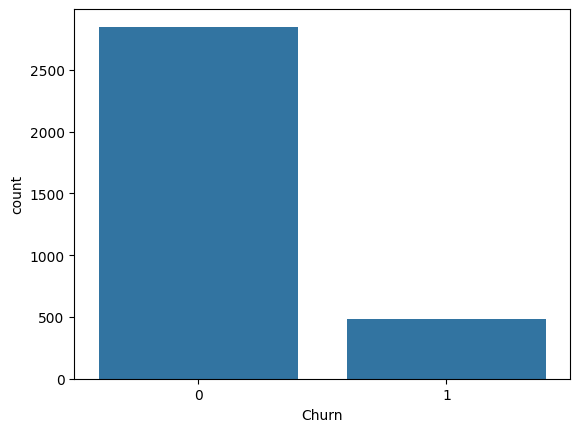

In [187]:
# visualiasi churn
sns.countplot(x ='Churn',data=df)

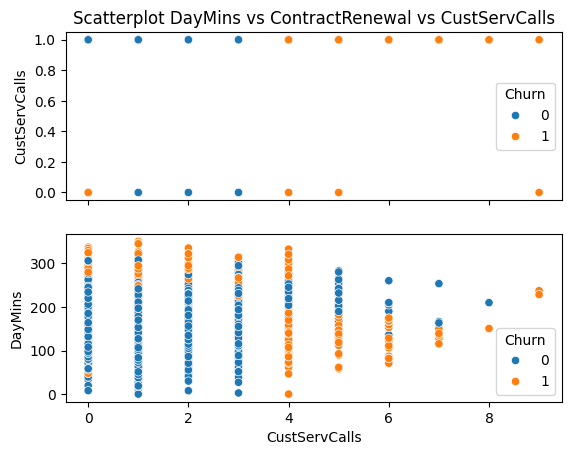

In [188]:
#scatterplot 1
ax = plt.subplot(211)
ax = sns.scatterplot(data=df, x=df['CustServCalls'], y = df['ContractRenewal'], hue=df['Churn'])
ax = plt.tick_params('x', labelbottom=False)
ax = plt.xlabel('')
ax = plt.ylabel('CustServCalls')

# judul
plt.title('Scatterplot DayMins vs ContractRenewal vs CustServCalls')

#scatterplot 2
ax1 = plt.subplot(212)
ax1 = sns.scatterplot(data=df, x=df['CustServCalls'], y = df['DayMins'], hue=df['Churn'])
ax1 = plt.xlabel('CustServCalls')
ax1 = plt.ylabel('DayMins')

<Axes: xlabel='DayMins', ylabel='Count'>

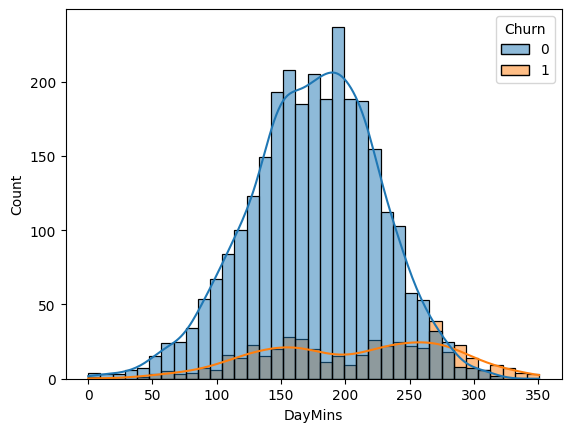

In [189]:
# menumpukan 2 histogram dalam 1 grafik dengan penyajian yang beda warna berdasarkan kolom churn
sns.histplot( data = df, x = df["DayMins"], hue = df["Churn"], multiple="layer", kde = True )

Text(0.5, 1.0, 'korelasi')

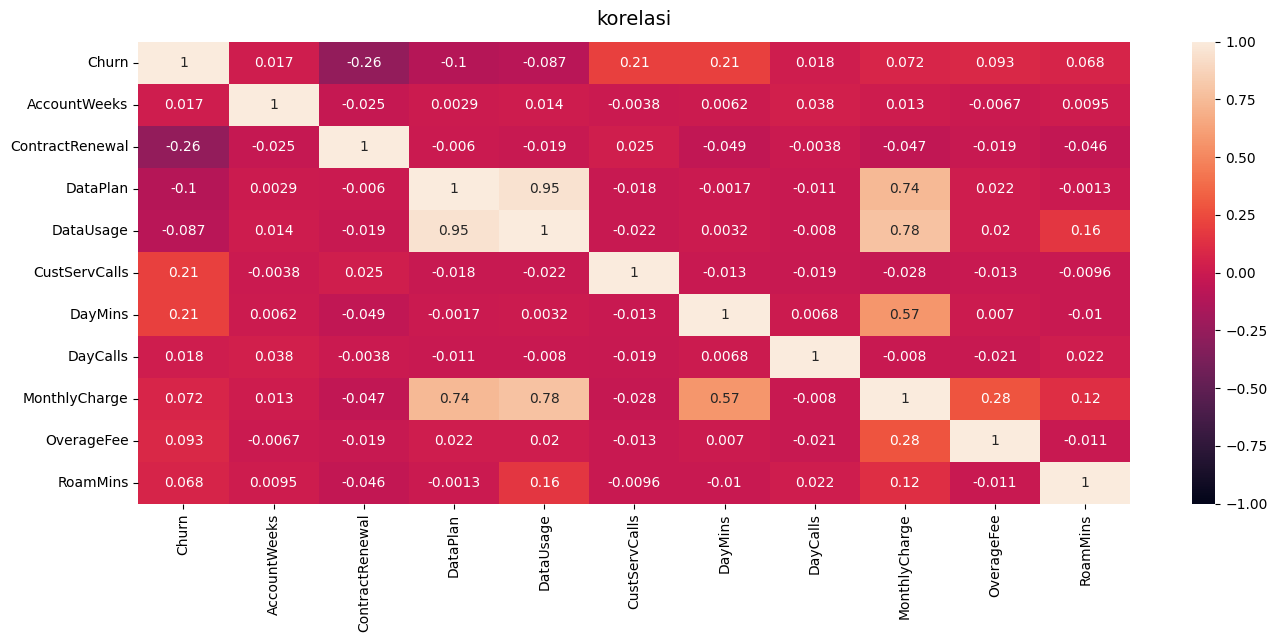

In [190]:
#heatmap
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df.corr(),vmin=-1,vmax=1,annot=True)
heatmap.set_title("korelasi",fontdict={"fontsize":14}, pad=12)

Feature Importance

In [191]:
# defining feature matrix(X) and response vector(y)
x_fit = df.loc[:, df.columns != 'Churn']
y_fit = df["Churn"]

scaler = StandardScaler()
x_fit_scaled = scaler.fit_transform(x_fit)

In [192]:
# model
model_lg = LogisticRegression()
model_rfc = RandomForestClassifier()
model_xgbc = XGBClassifier()
model_knnc = KNeighborsClassifier()

model_lg.fit(x_fit_scaled,y_fit)
model_rfc.fit(x_fit_scaled, y_fit)
model_xgbc.fit(x_fit_scaled, y_fit)
model_knnc.fit(x_fit_scaled, y_fit)


KNeighborsClassifier()

In [193]:
# score importance
importance_lg = model_lg.coef_[0]
importance_rfc = model_rfc.feature_importances_

importance_xgbc = model_xgbc.feature_importances_

result_per_c = permutation_importance(model_knnc, x_fit_scaled, y_fit, scoring='accuracy')
importance_knnc = result_per_c.importances_mean

print("Model Logistic Regression")
for i, v_lg in enumerate(importance_lg):
    print(f"Feature : {i}, Score : {v_lg}")

print()
print("Model Random Forest Classifier")
for k, v_rfc in enumerate(importance_rfc):
    print(f"Feature : {k}, Score : {v_rfc}")

print()
print("Model Xgboost Classifier")
for l, v_xgbc in enumerate(importance_xgbc):
    print(f"Feature : {l}, Score : {v_xgbc}")

print()
print("Model knn permutation Classifier")
for m, v_knnc in enumerate(importance_knnc):
    print(f"Feature : {m}, Score : {v_knnc}")

Model Logistic Regression
Feature : 0, Score : 0.026287830431009185
Feature : 1, Score : -0.5860750516285341
Feature : 2, Score : -0.5048649815804063
Feature : 3, Score : -0.12244882601204961
Feature : 4, Score : 0.6655822892154822
Feature : 5, Score : 0.537593860297334
Feature : 6, Score : 0.07274334984866256
Feature : 7, Score : 0.2739070211931459
Feature : 8, Score : 0.28115273241983846
Feature : 9, Score : 0.22169976094824503

Model Random Forest Classifier
Feature : 0, Score : 0.06144409898453828
Feature : 1, Score : 0.07087036490171385
Feature : 2, Score : 0.022186040846251705
Feature : 3, Score : 0.07642514175147247
Feature : 4, Score : 0.1381858682795996
Feature : 5, Score : 0.1972096406658879
Feature : 6, Score : 0.06127339032976145
Feature : 7, Score : 0.17137605845417622
Feature : 8, Score : 0.10393126284111125
Feature : 9, Score : 0.0970981329454873

Model Xgboost Classifier
Feature : 0, Score : 0.018703322857618332
Feature : 1, Score : 0.15621021389961243
Feature : 2, Scor

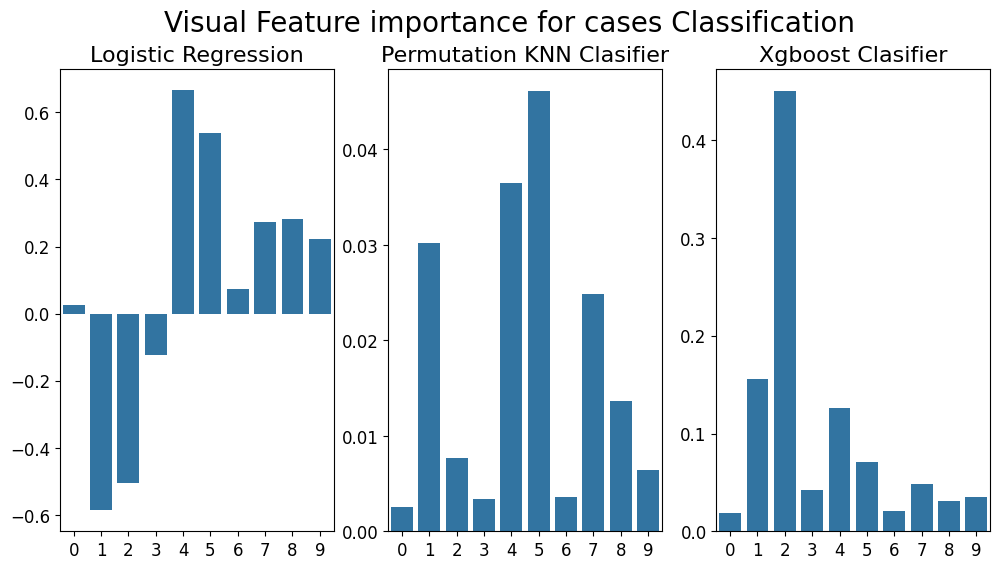

In [194]:
# visual
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(12,6))

sns.barplot(x=[x for x in range(len(importance_lg))], y=importance_lg, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Logistic Regression", loc="center", fontsize=16)
ax[0].tick_params(axis = 'x', labelsize=12)
ax[0].tick_params(axis = 'y', labelsize=12)

sns.barplot(x=[x for x in range(len(importance_knnc))], y=importance_knnc, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title("Permutation KNN Clasifier", loc="center", fontsize=16)
ax[1].tick_params(axis = 'x', labelsize=12)
ax[1].tick_params(axis = 'y', labelsize=12)

sns.barplot(x=[x for x in range(len(importance_xgbc))], y=importance_xgbc, ax=ax[2])
ax[2].set_ylabel(None)
ax[2].set_xlabel(None)
ax[2].set_title("Xgboost Clasifier", loc="center", fontsize=16)
ax[2].tick_params(axis = 'x', labelsize=12)
ax[2].tick_params(axis = 'y', labelsize=12)

plt.suptitle("Visual Feature importance for cases Classification", fontsize=20)
plt.show()


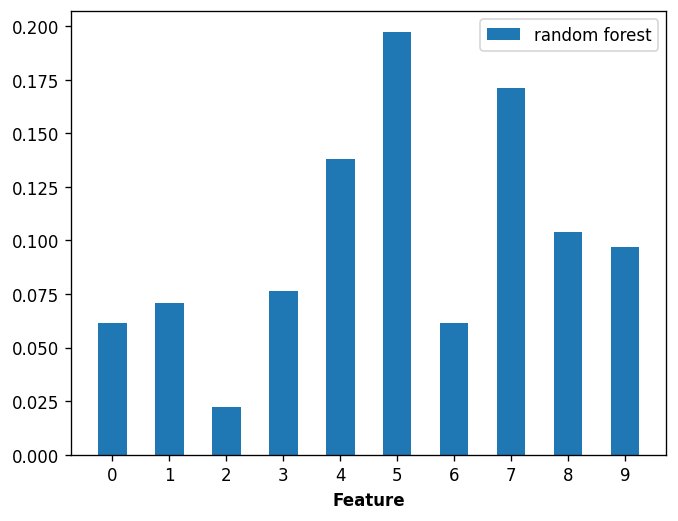

In [195]:
# visual random forest
fig, ax = plt.subplots(dpi=120)
ax.bar(np.arange(10),importance_rfc,width=0.5, label='random forest')

ax.set_xlabel('Feature', fontweight='bold')
ax.set_xticks(np.arange(10))

ax.legend()
plt.show()   

In [196]:
'''
Feature Importance
Logistic Regression : 1, 2, 4,5
KNN CLasifier : 1, 4, 5,7
Xgboots : 1, 2, 4
Random Forest : 4, 5, 7
'''

'\nFeature Importance\nLogistic Regression : 1, 2, 4,5\nKNN CLasifier : 1, 4, 5,7\nXgboots : 1, 2, 4\nRandom Forest : 4, 5, 7\n'

In [197]:
df.loc[:, df.columns != 'Churn']

,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,128,1,1,2.70,1,265.1,110,89.0,9.87,10.0
1,107,1,1,3.70,1,161.6,123,82.0,9.78,13.7
2,137,1,0,0.00,0,243.4,114,52.0,6.06,12.2
3,84,0,0,0.00,2,299.4,71,57.0,3.10,6.6
4,75,0,0,0.00,3,166.7,113,41.0,7.42,10.1
...,...,...,...,...,...,...,...,...,...,...
3328,192,1,1,2.67,2,156.2,77,71.7,10.78,9.9
3329,68,1,0,0.34,3,231.1,57,56.4,7.67,9.6
3330,28,1,0,0.00,2,180.8,109,56.0,14.44,14.1
3331,184,0,0,0.00,2,213.8,105,50.0,7.98,5.0


In [198]:
# data modeling
df_test = df[["ContractRenewal","DataPlan","CustServCalls","DayMins","MonthlyCharge"]]
df_test

,ContractRenewal,DataPlan,CustServCalls,DayMins,MonthlyCharge
0,1,1,1,265.1,89.0
1,1,1,1,161.6,82.0
2,1,0,0,243.4,52.0
3,0,0,2,299.4,57.0
4,0,0,3,166.7,41.0
...,...,...,...,...,...
3328,1,1,2,156.2,71.7
3329,1,0,3,231.1,56.4
3330,1,0,2,180.8,56.0
3331,0,0,2,213.8,50.0


In [199]:
# splitting X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_test, y_fit, test_size=0.2,
                                                    random_state=1)

In [200]:
# normalization & SMOTE
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

smote = SMOTE(sampling_strategy='auto', random_state=1)
X_resampled, y_resampled = smote.fit_resample(X_train_scaled, y_train)

In [201]:
from collections import Counter
Counter(y_resampled)

Counter({0: 2281, 1: 2281})

<Axes: ylabel='count'>

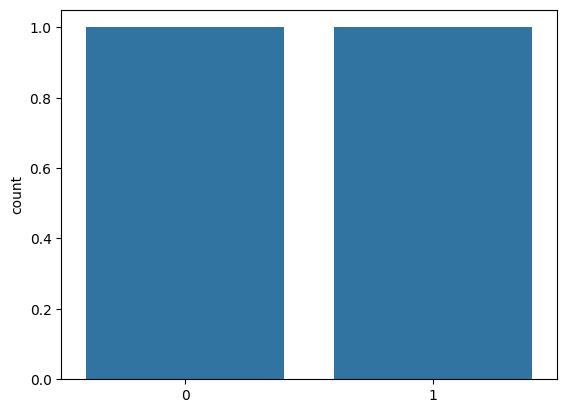

In [202]:
# visualisasi Churn
sns.countplot(Counter(y_resampled))

Model

In [203]:
model_lg.fit(X_resampled,y_resampled)
model_rfc.fit(X_resampled,y_resampled)
model_xgbc.fit(X_resampled, y_resampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

Evaluation

In [204]:
y_lr = model_lg.predict(X_test_scaled)
y_rf = model_rfc.predict(X_test_scaled)
y_xg = model_xgbc.predict(X_test_scaled)

In [205]:
# akurasi
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_lr))
print(accuracy_score(y_test, y_rf))
print(accuracy_score(y_test, y_xg))

0.7466266866566716
0.8755622188905547
0.8830584707646177


In [206]:
# AUC
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_lr, pos_label=1)
print(auc(fpr, tpr))
fpr, tpr, thresholds = roc_curve(y_test, y_rf, pos_label=1) 
print(auc(fpr, tpr))
fpr, tpr, thresholds = roc_curve(y_test, y_xg, pos_label=1) 
print(auc(fpr, tpr))

0.741687887808902
0.8045891467307486
0.8089828198414691


In [ ]:
# classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_lr))
print(classification_report(y_test, y_rf))
print(classification_report(y_test, y_xg))

              precision    recall  f1-score   support

           0       0.94      0.75      0.83       569
           1       0.33      0.73      0.46        98

    accuracy                           0.75       667
   macro avg       0.64      0.74      0.65       667
weighted avg       0.85      0.75      0.78       667

              precision    recall  f1-score   support

           0       0.95      0.91      0.93       569
           1       0.56      0.70      0.62        98

    accuracy                           0.88       667
   macro avg       0.75      0.80      0.77       667
weighted avg       0.89      0.88      0.88       667

              precision    recall  f1-score   support

           0       0.95      0.91      0.93       569
           1       0.58      0.70      0.64        98

    accuracy                           0.88       667
   macro avg       0.77      0.81      0.78       667
weighted avg       0.89      0.88      0.89       667

